In [1]:
import numpy as np
from decimal import Decimal
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.widgets import Slider, Button, RadioButtons
import random
import timeit
import scipy.fftpack
import scipy.io as sio
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate
from PIL import Image

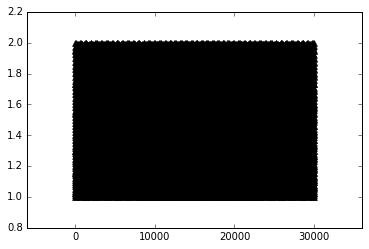

In [16]:



z = 30000
n1 = 2
n2 = 3
xcor = []
ycor =[]
x = 0
i = 0




def pycode(x):
    n = math.floor(Decimal(x*(math.log(n2,math.e)/math.log(n1,math.e))))#a1
    return n

while x <= z:
    ycor.append(Decimal(n2**x/n1**pycode(x)))
    ycor.append(Decimal(n1**(pycode(x)+1)/n2**x))
    x += 1
while i <= z*2+1: #math done to allign x and y coordinates
    i+=1
    xcor.append(i)
labels = []
   
plt.subplot(111,polar=False)

plt.plot(xcor[0:z:2], ycor[0:z:2], 'k^')
plt.plot(xcor[1:z:2], ycor[1:z:2], 'k^')
#plt.plot(xcor,ycor,'k')
# You can specify a rotation for the tick labels in degrees or with keywords.
#plt.xticks(xcor, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

clist=[]
plist =[]
for i in range(13):
    clist.append(2**(i/12))
def patfind(listy):
    for j in range(len(listy)):
        if listy[j] >= clist[0] and listy[j] < clist[0]*2**(50/1200):
            plist.append('P1')
        elif listy[j] >= clist[1]*2**(-50/1200) and listy[j] < clist[1]*2**(50/1200):
            plist.append('m2')
        elif listy[j] >= clist[2]*2**(-50/1200) and listy[j] < clist[2]*2**(50/1200):
            plist.append('M2')
        elif listy[j] >= clist[3]*2**(-50/1200) and listy[j] < clist[3]*2**(50/1200):
            plist.append('m3')
        elif listy[j] >= clist[4]*2**(-50/1200) and listy[j] < clist[4]*2**(50/1200):
            plist.append('M3')
        elif listy[j] >= clist[5]*2**(-50/1200) and listy[j] < clist[5]*2**(50/1200):
            plist.append('P4')
        elif listy[j] >= clist[6]*2**(-50/1200) and listy[j] < clist[6]*2**(50/1200):
            plist.append('TT')
        elif listy[j] >= clist[7]*2**(-50/1200) and listy[j] < clist[7]*2**(50/1200):
            plist.append('P5')
        elif listy[j] >= clist[8]*2**(-50/1200) and listy[j] < clist[8]*2**(50/1200):
            plist.append('m6')
        elif listy[j] >= clist[9]*2**(-50/1200) and listy[j] < clist[9]*2**(50/1200):
            plist.append('M6')
        elif listy[j] >= clist[10]*2**(-50/1200) and listy[j] < clist[10]*2**(50/1200):
            plist.append('m7')
        elif listy[j] >= clist[11]*2**(-50/1200) and listy[j] < clist[11]*2**(50/1200):
            plist.append('M7')    
        elif listy[j] <= clist[12]:
            plist.append('P8') 
patfind(ycor)   
start = 0
end = 24
#while end < len(plist):
#    print(' '.join(plist[start:end]))
#    start = start+24
#    end = end+24
note_histogram = dict.fromkeys(plist,0)
for note in plist:
    note_histogram[note] = note_histogram[note]+1

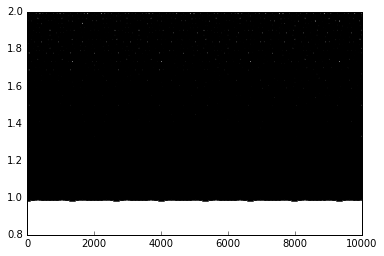

In [3]:
rng = z
srate=rng+1
x_ = np.linspace(0,rng,srate)

y = []
f = []
for i in x_:
    #y.append(Decimal(n2**i/n1**pycode(i)))
    #y.append(Decimal(n1**(pycode(i)+1)/n2**i))
    y.append(ycor[int(i)])
    
#rng = 2*rng
#srate = rng+2
#x_ = np.linspace(0,rng,srate)

plt.plot(x_,y,'k^')


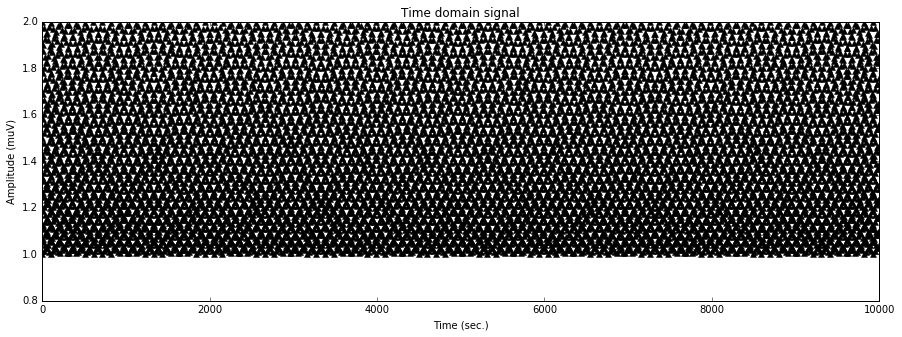

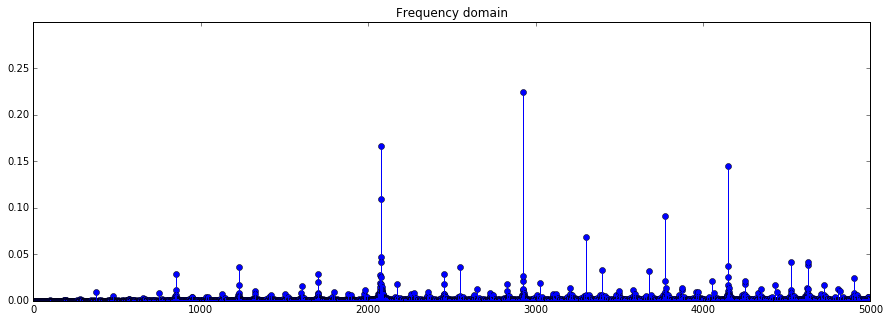

In [4]:
# extract data from mat file
eegdata = np.array(y)



n = len(x_)
timevec = np.arange(n)/srate

# compute amplitude spectrum
dataX    = scipy.fftpack.fft(eegdata)/n
ampspect = 2*abs(dataX)
hz       = np.linspace(0,srate/2,int(np.floor(n/2)+1))

#freq spectum
plt.figure(figsize=(15,5))
plt.plot(x_,eegdata,'k^')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (muV)')
plt.title('Time domain signal')
plt.show()

# show amplitude spectrum
plt.figure(figsize=(15,5))
plt.stem(hz,ampspect[0:int(np.floor(n/2)+1)],color='blue')
plt.xlim([0,srate/2])
plt.ylim([0,.3])
plt.title('Frequency domain')
plt.show()

In [5]:
clist=[]
ycor
for i in range(13):
    clist.append(2**(i/12))
def notefind(listy):
    for j in listy:
        if j >= clist[0] and j < clist[0]*2**(50/1200):
            print('P1', j)
        elif j >= clist[1]*2**(-50/1200) and j < clist[1]*2**(50/1200):
            print('m2', j)
        elif j >= clist[2]*2**(-50/1200) and j < clist[2]*2**(50/1200):
            print('M2', j)
        elif j >= clist[3]*2**(-50/1200) and j < clist[3]*2**(50/1200):
            print('m3', j)
        elif j >= clist[4]*2**(-50/1200) and j < clist[4]*2**(50/1200):
            print('M3', j)
        elif j >= clist[5]*2**(-50/1200) and j < clist[5]*2**(50/1200):
            print('P4', j)
        elif j >= clist[6]*2**(-50/1200) and j < clist[6]*2**(50/1200):
            print('TT', j)
        elif j >= clist[7]*2**(-50/1200) and j < clist[7]*2**(50/1200):
            print('P5', j)
        elif j >= clist[8]*2**(-50/1200) and j < clist[8]*2**(50/1200):
            print('m6', j)
        elif j >= clist[9]*2**(-50/1200) and j < clist[9]*2**(50/1200):
            print('M6', j)
        elif j >= clist[10]*2**(-50/1200) and j < clist[10]*2**(50/1200):
            print('m7', j)
        elif j >= clist[11]*2**(-50/1200) and j < clist[11]*2**(50/1200):
            print('M7', j)    
        elif j <= clist[12]:
            print('P8', j)    



In [10]:
notefind(ycor)

P1 1
P8 2
P5 1.5
P4 1.3333333333333332593184650249895639717578887939453125
M2 1.125
m7 1.77777777777777767909128669998608529567718505859375
M6 1.6875
m3 1.1851851851851851193941911333240568637847900390625
M3 1.265625
m6 1.58024691358024682585892151109874248504638671875
M7 1.8984375
m2 1.053497942386831365269017624086700379848480224609375
TT 1.423828125
TT 1.4046639231824415983140852404176257550716400146484375
m2 1.06787109375
M7 1.8728852309099222051003152955672703683376312255859375
m6 1.601806640625
M3 1.2485901539399482107484118387219496071338653564453125
m3 1.20135498046875
M6 1.664786871919930799634812501608394086360931396484375
m7 1.802032470703125
M2 1.10985791461328719975654166773892939090728759765625
P4 1.35152435302734375
P5 1.4798105528177163403569238653290085494518280029296875
P1 1.0136432647705078125
P8 1.9730807370902885278241001287824474275112152099609375
P5 1.52046489715576171875
P4 1.315387158060192351882733419188298285007476806640625
M2 1.1403486728668212890625
m7 1.75

m6 1.615241808550185620418915277696214616298675537109375
M3 1.2382047006294165658601968971197493374347686767578125
m3 1.21143135641263910429188399575650691986083984375
M6 1.65093960083922208781359586282633244991302490234375
m7 1.8171470346189588784824309186660684645175933837890625
M2 1.1006264005594814658905988835613243281841278076171875
P4 1.36286027596421899232836949522607028484344482421875
P5 1.4675018674126418805059302030713297426700592041015625
P1 1.0221452069731642442462771214195527136325836181640625
P8 1.9566691565501892480227752457722090184688568115234375
P5 1.533217810459746477391718144644983112812042236328125
P4 1.3044461043667927580003151888377033174037933349609375
M2 1.1499133578448097470214861459680832922458648681640625
m7 1.739261472489057158696823535137809813022613525390625
M6 1.724870036767214731554531681467778980731964111328125
m3 1.1595076483260380317830140484147705137729644775390625
M3 1.293652527575411159688201223616488277912139892578125
m6 1.54601019776805070904401

m2 1.0667334635711807067082190769724547863006591796875
TT 1.406161943189015328670166127267293632030487060546875
TT 1.4223112847615742015960904609528370201587677001953125
m2 1.054621457391761385480322132934816181659698486328125
M7 1.896415046348765454098383997916243970394134521484375
m6 1.58193218608764230026508812443353235721588134765625
M3 1.2642766975658437100804576402879320085048675537109375
m3 1.1864491395657317251988160933251492679119110107421875
M6 1.68570226342112494677394352038390934467315673828125
m7 1.77967370934859747677592167747206985950469970703125
M2 1.1238015089474167051974973219330422580242156982421875
P4 1.3347552820114481075819412581040523946285247802734375
P5 1.4984020119298888662484614542336203157901763916015625
P1 1.0010664615085860251753047123202122747898101806640625
P8 1.99786934923985182166461527231149375438690185546875
P5 1.501599692262879148785259530995972454547882080078125
P4 1.3319128994932345477764101815409958362579345703125
M2 1.126199769197159250566642185

M6 1.69991531332520029451416121446527540683746337890625
m3 1.1765291978503358283347779433825053274631500244140625
M3 1.2749364849939002208856209108489565551280975341796875
m6 1.56870559713378110444637059117667376995086669921875
M7 1.9124047274908502203061289037577807903289794921875
m2 1.045803731422520588267843777430243790149688720703125
TT 1.434303545618137665229596677818335592746734619140625
TT 1.394404975230027599053528319927863776683807373046875
m2 1.0757276592136033599444999708794057369232177734375
M7 1.8592066336400367987380377599038183689117431640625
m6 1.6135914888204048178721450312878005206584930419921875
M3 1.2394710890933577918104901982587762176990509033203125
m3 1.210193616615303557892957542208023369312286376953125
M6 1.6526281187911437964288552393554709851741790771484375
m7 1.81529042492295555888404123834334313869476318359375
M2 1.1017520791940957902710351845598779618740081787109375
P4 1.3614678186922166691630309287575073540210723876953125
P5 1.4690027722587943870280469127

m2 1.055746170582198661946904394426383078098297119140625
M7 1.8943947472687356903264799257158301770687103271484375
m6 1.5836192558732979929203565916395746171474456787109375
M3 1.262929831512490608247389900498092174530029296875
m3 1.18771444190497366122372113750316202640533447265625
M6 1.6839064420166540703149848923203535377979278564453125
m7 1.7815716628574602697909767812234349548816680908203125
M2 1.1226042946777694542248582365573383867740631103515625
P4 1.33617874714309525785438381717540323734283447265625
P5 1.496805726237025790936741032055579125881195068359375
P1 1.0021340603573214433907878628815524280071258544921875
P8 1.9957409683160343139007864010636694729328155517578125
P5 1.5032010905359822761084842568379826843738555908203125
P4 1.330493978877356209267190934042446315288543701171875
M2 1.1274008179019865405479094988550059497356414794921875
m7 1.7739919718364749456895879120565950870513916015625
M6 1.6911012268529799218441667107981629669666290283203125
m3 1.18266131455765011182279

P4 1.3086239814267719427931524478481151163578033447265625
P5 1.528322901296239155755074534681625664234161376953125
P8 1.962935972140158025212031134287826716899871826171875
P1 1.0188819341974928445182513314648531377315521240234375
P5 1.472201979105118407886720888200215995311737060546875
P4 1.3585092455966572000392034169635735452175140380859375
M2 1.1041514843288389169373431286658160388469696044921875
m7 1.8113456607955427113409996309201233088970184326171875
M6 1.65622722649325826438371223048307001590728759765625
m3 1.2075637738636952889237363706342875957489013671875
M3 1.2421704198699436982877841728623025119304656982421875
m6 1.610085031818260237201911877491511404514312744140625
M7 1.86325562980491543640937379677779972553253173828125
m2 1.0733900212121734174530729433172382414340972900390625
TT 1.3974417223536865773070303475833497941493988037109375
TT 1.4311866949495646306189655661000870168209075927734375
m2 1.04808129176526509951372645446099340915679931640625
M7 1.9082489265994195815068

In [25]:
clist[8]

1.5874010519681994

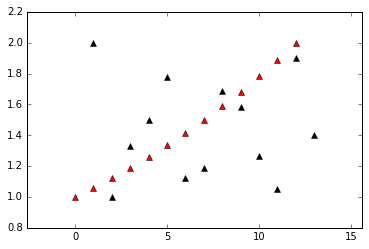

In [39]:
plt.subplot(111,polar=False)
x = np.arange(0,13)
plt.plot(xcor[0:z:2], ycor[0:z:2], 'k^')
plt.plot(xcor[1:z:2], ycor[1:z:2], 'k^')
plt.plot(x, clist, 'r^')
#plt.plot(xcor,ycor,'k')
# You can specify a rotation for the tick labels in degrees or with keywords.
#plt.xticks(xcor, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [34]:
len(x)

12

In [41]:
len(clist)

13

In [36]:
ycor

[Decimal('1.3333333333333332593184650249895639717578887939453125'),
 Decimal('1.5'),
 Decimal('1.77777777777777767909128669998608529567718505859375'),
 Decimal('1.125'),
 Decimal('1.1851851851851851193941911333240568637847900390625'),
 Decimal('1.6875'),
 Decimal('1.58024691358024682585892151109874248504638671875'),
 Decimal('1.265625'),
 Decimal('1.053497942386831365269017624086700379848480224609375'),
 Decimal('1.8984375'),
 Decimal('1.4046639231824415983140852404176257550716400146484375'),
 Decimal('1.423828125'),
 Decimal('1.8728852309099222051003152955672703683376312255859375'),
 Decimal('1.06787109375'),
 Decimal('1.2485901539399482107484118387219496071338653564453125'),
 Decimal('1.601806640625'),
 Decimal('1.664786871919930799634812501608394086360931396484375'),
 Decimal('1.20135498046875'),
 Decimal('1.10985791461328719975654166773892939090728759765625'),
 Decimal('1.802032470703125'),
 Decimal('1.4798105528177163403569238653290085494518280029296875'),
 Decimal('1.351524353027

In [14]:
clist=[]
plist =[]
for i in range(13):
    clist.append(2**(i/12))
def patfind(listy):
    for j in range(len(listy)):
        if listy[j] >= clist[0] and listy[j] < clist[0]*2**(50/1200):
            plist.append('P1')
        elif listy[j] >= clist[1]*2**(-50/1200) and listy[j] < clist[1]*2**(50/1200):
            plist.append('m2')
        elif listy[j] >= clist[2]*2**(-50/1200) and listy[j] < clist[2]*2**(50/1200):
            plist.append('M2')
        elif listy[j] >= clist[3]*2**(-50/1200) and listy[j] < clist[3]*2**(50/1200):
            plist.append('m3')
        elif listy[j] >= clist[4]*2**(-50/1200) and listy[j] < clist[4]*2**(50/1200):
            plist.append('M3')
        elif listy[j] >= clist[5]*2**(-50/1200) and listy[j] < clist[5]*2**(50/1200):
            plist.append('P4')
        elif listy[j] >= clist[6]*2**(-50/1200) and listy[j] < clist[6]*2**(50/1200):
            plist.append('TT')
        elif listy[j] >= clist[7]*2**(-50/1200) and listy[j] < clist[7]*2**(50/1200):
            plist.append('P5')
        elif listy[j] >= clist[8]*2**(-50/1200) and listy[j] < clist[8]*2**(50/1200):
            plist.append('m6')
        elif listy[j] >= clist[9]*2**(-50/1200) and listy[j] < clist[9]*2**(50/1200):
            plist.append('M6')
        elif listy[j] >= clist[10]*2**(-50/1200) and listy[j] < clist[10]*2**(50/1200):
            plist.append('m7')
        elif listy[j] >= clist[11]*2**(-50/1200) and listy[j] < clist[11]*2**(50/1200):
            plist.append('M7')    
        elif listy[j] <= clist[12]:
            plist.append('P8') 
patfind(ycor)   
start = 0
end = 24
#while end < len(plist):
#    print(' '.join(plist[start:end]))
#    start = start+24
#    end = end+24
note_histogram = dict.fromkeys(plist,0)
for note in plist:
    note_histogram[note] = note_histogram[note]+1

In [13]:
note_histogram = dict.fromkeys(plist,0)
for note in plist:
    note_histogram[note] = note_histogram[note]+1

In [11]:
for note in plist:
    note_histogram[note] = note_histogram[note]+1

In [15]:
note_histogram

{'M2': 1669,
 'M3': 1665,
 'M6': 1665,
 'M7': 1664,
 'P1': 836,
 'P4': 1670,
 'P5': 1670,
 'P8': 836,
 'TT': 1664,
 'm2': 1664,
 'm3': 1665,
 'm6': 1665,
 'm7': 1669}

In [137]:
print(' '.join(plist[:24]))
print(' '.join(plist[24:48]))
print(' '.join(plist[48:72]))
print(' '.join(plist[72:96]) )
print(' '.join(plist[72:96]) )

P1 P8 P5 P4 M2 m7 M6 m3 M3 m6 M7 m2 TT TT m2 M7 m6 M3 m3 M6 m7 M2 P4 P5
P1 P8 P5 P4 M2 m7 M6 m3 M3 m6 M7 m2 TT TT m2 M7 m6 M3 m3 M6 m7 M2 P4 P5
P1 P8 P5 P4 m3 M6 m7 M2 P4 P5 P8 P1 P5 P4 M2 m7 M6 m3 M3 m6 M7 m2 TT TT
m2 M7 m6 M3 m3 M6 m7 M2 P4 P5 P8 P1 P5 P4 M2 m7 M6 m3 M3 m6 M7 m2 TT TT


In [139]:
start = 0
end = 24
while end < len(plist):
    print(' '.join(plist[start:end]))
    start = start+24
    end = end+24

P1 P8 P5 P4 M2 m7 M6 m3 M3 m6 M7 m2 TT TT m2 M7 m6 M3 m3 M6 m7 M2 P4 P5
P1 P8 P5 P4 M2 m7 M6 m3 M3 m6 M7 m2 TT TT m2 M7 m6 M3 m3 M6 m7 M2 P4 P5
P1 P8 P5 P4 m3 M6 m7 M2 P4 P5 P8 P1 P5 P4 M2 m7 M6 m3 M3 m6 M7 m2 TT TT
m2 M7 m6 M3 m3 M6 m7 M2 P4 P5 P8 P1 P5 P4 M2 m7 M6 m3 M3 m6 M7 m2 TT TT
m2 M7 m6 M3 m3 M6 m7 M2 P4 P5 P1 P8 P5 P4 M2 m7 M6 m3 M3 m6 M7 m2 TT TT
m2 M7 m6 M3 m3 M6 m7 M2 P4 P5 P1 P8 P5 P4 M2 m7 M6 m3 M3 m6 M7 m2 TT TT
m2 M7 m6 M3 m3 M6 m7 M2 P4 P5 m2 M7 m6 M3 m3 M6 m7 M2 P4 P5 P8 P1 P5 P4
M2 m7 M6 m3 M3 m6 M7 m2 TT TT m2 M7 m6 M3 m3 M6 m7 M2 P4 P5 P8 P1 P5 P4


In [144]:
plist[0]

'P1'

In [11]:
clist[7]*2**(50/1200)

1.542210825407941

In [12]:
clist[5]*2**(-50/1200)

1.2968395546510096

In [13]:
clist[5]*2**(50/1200)

1.3739536474580891

In [17]:
(1+math.sqrt(5))/2

1.618033988749895

In [18]:
note_histogram

{'M2': 5002,
 'M3': 4998,
 'M6': 5001,
 'M7': 4998,
 'P1': 2501,
 'P4': 5003,
 'P5': 5003,
 'P8': 2501,
 'TT': 4996,
 'm2': 4998,
 'm3': 5001,
 'm6': 4998,
 'm7': 5002}